# Car Dataset Project using Linear Regression:
__In this project, we try to implement a linear regression model on a car dataset and increase the performance of the model as much as possible. Finally, we estimate the target value (Selling_Price) for a given sample:__

* Present_Price = 11.23
* Kms_Driven = 42000
* Fuel_Type = Petrol
* Seller_Type = Dealer
* Transmission = Manual
* Owner = 1
* Age = 10
* Selling_Price = ?



_____
### Let's get started:

# 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# 2. Importing the Dataset


In [2]:
df = pd.read_csv('cardata.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


# 3. Checking out the Dataset

In [3]:
df.shape

(301, 9)

In [4]:
df.describe(include='all')

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


# 3.1. Discovering NaN Values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.isnull().sum().sum()

0

__There is no missing value in the dataset.__

# 3.2. Discovering Duplicates

In [7]:
df1 = df.copy()
df1[df1.duplicated(keep=False)]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
15,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
51,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


__Since it is possible to have cars with the same features, we do not remove duplicate samples from the dataframe!__

# 3.3. "Year" Feature Pre-processing
__We calculate the age of cars using the Year feature. We consider the origin of time to calculate the age of cars to be one year longer than the maximum year in the dataset (2019) and finally, we replace Year feature with Age feature:__

In [8]:
df1['Year'].describe()

count     301.000000
mean     2013.627907
std         2.891554
min      2003.000000
25%      2012.000000
50%      2014.000000
75%      2016.000000
max      2018.000000
Name: Year, dtype: float64

In [9]:
df1['Year'].max()

2018

In [10]:
df1.insert(0, "Age", df["Year"].apply(lambda x: df["Year"].max()+1-x ))
df1.drop('Year', axis=1, inplace=True)
df1

,Age,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,6,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,8,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,5,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,3,city,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,4,brio,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,10,city,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2,city,11.50,12.50,9000,Diesel,Dealer,Manual,0


__"Year" feature was removed and "Age" feature was added instead to the dataframe.__

# 3.4. "Car_Name" Feature Dropping
__Since Car_Name feature is a categorical feature with several classes and the number of samples in the dataset is small, we remove this feature before training linear regression model:__

In [11]:
df1['Car_Name'].nunique()

98

__Car_Name contains 98 different categories!__

In [12]:
df1.drop('Car_Name', axis=1, inplace=True)
df1

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,6,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,8,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,5,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,3,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,4,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,10,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 18.9+ KB


__Car_Name feature was removed from dataframe sucessfully.__

# 3.4. Outlier Detection
__We plot target graph versus all the features individually in order to detect outliers:__

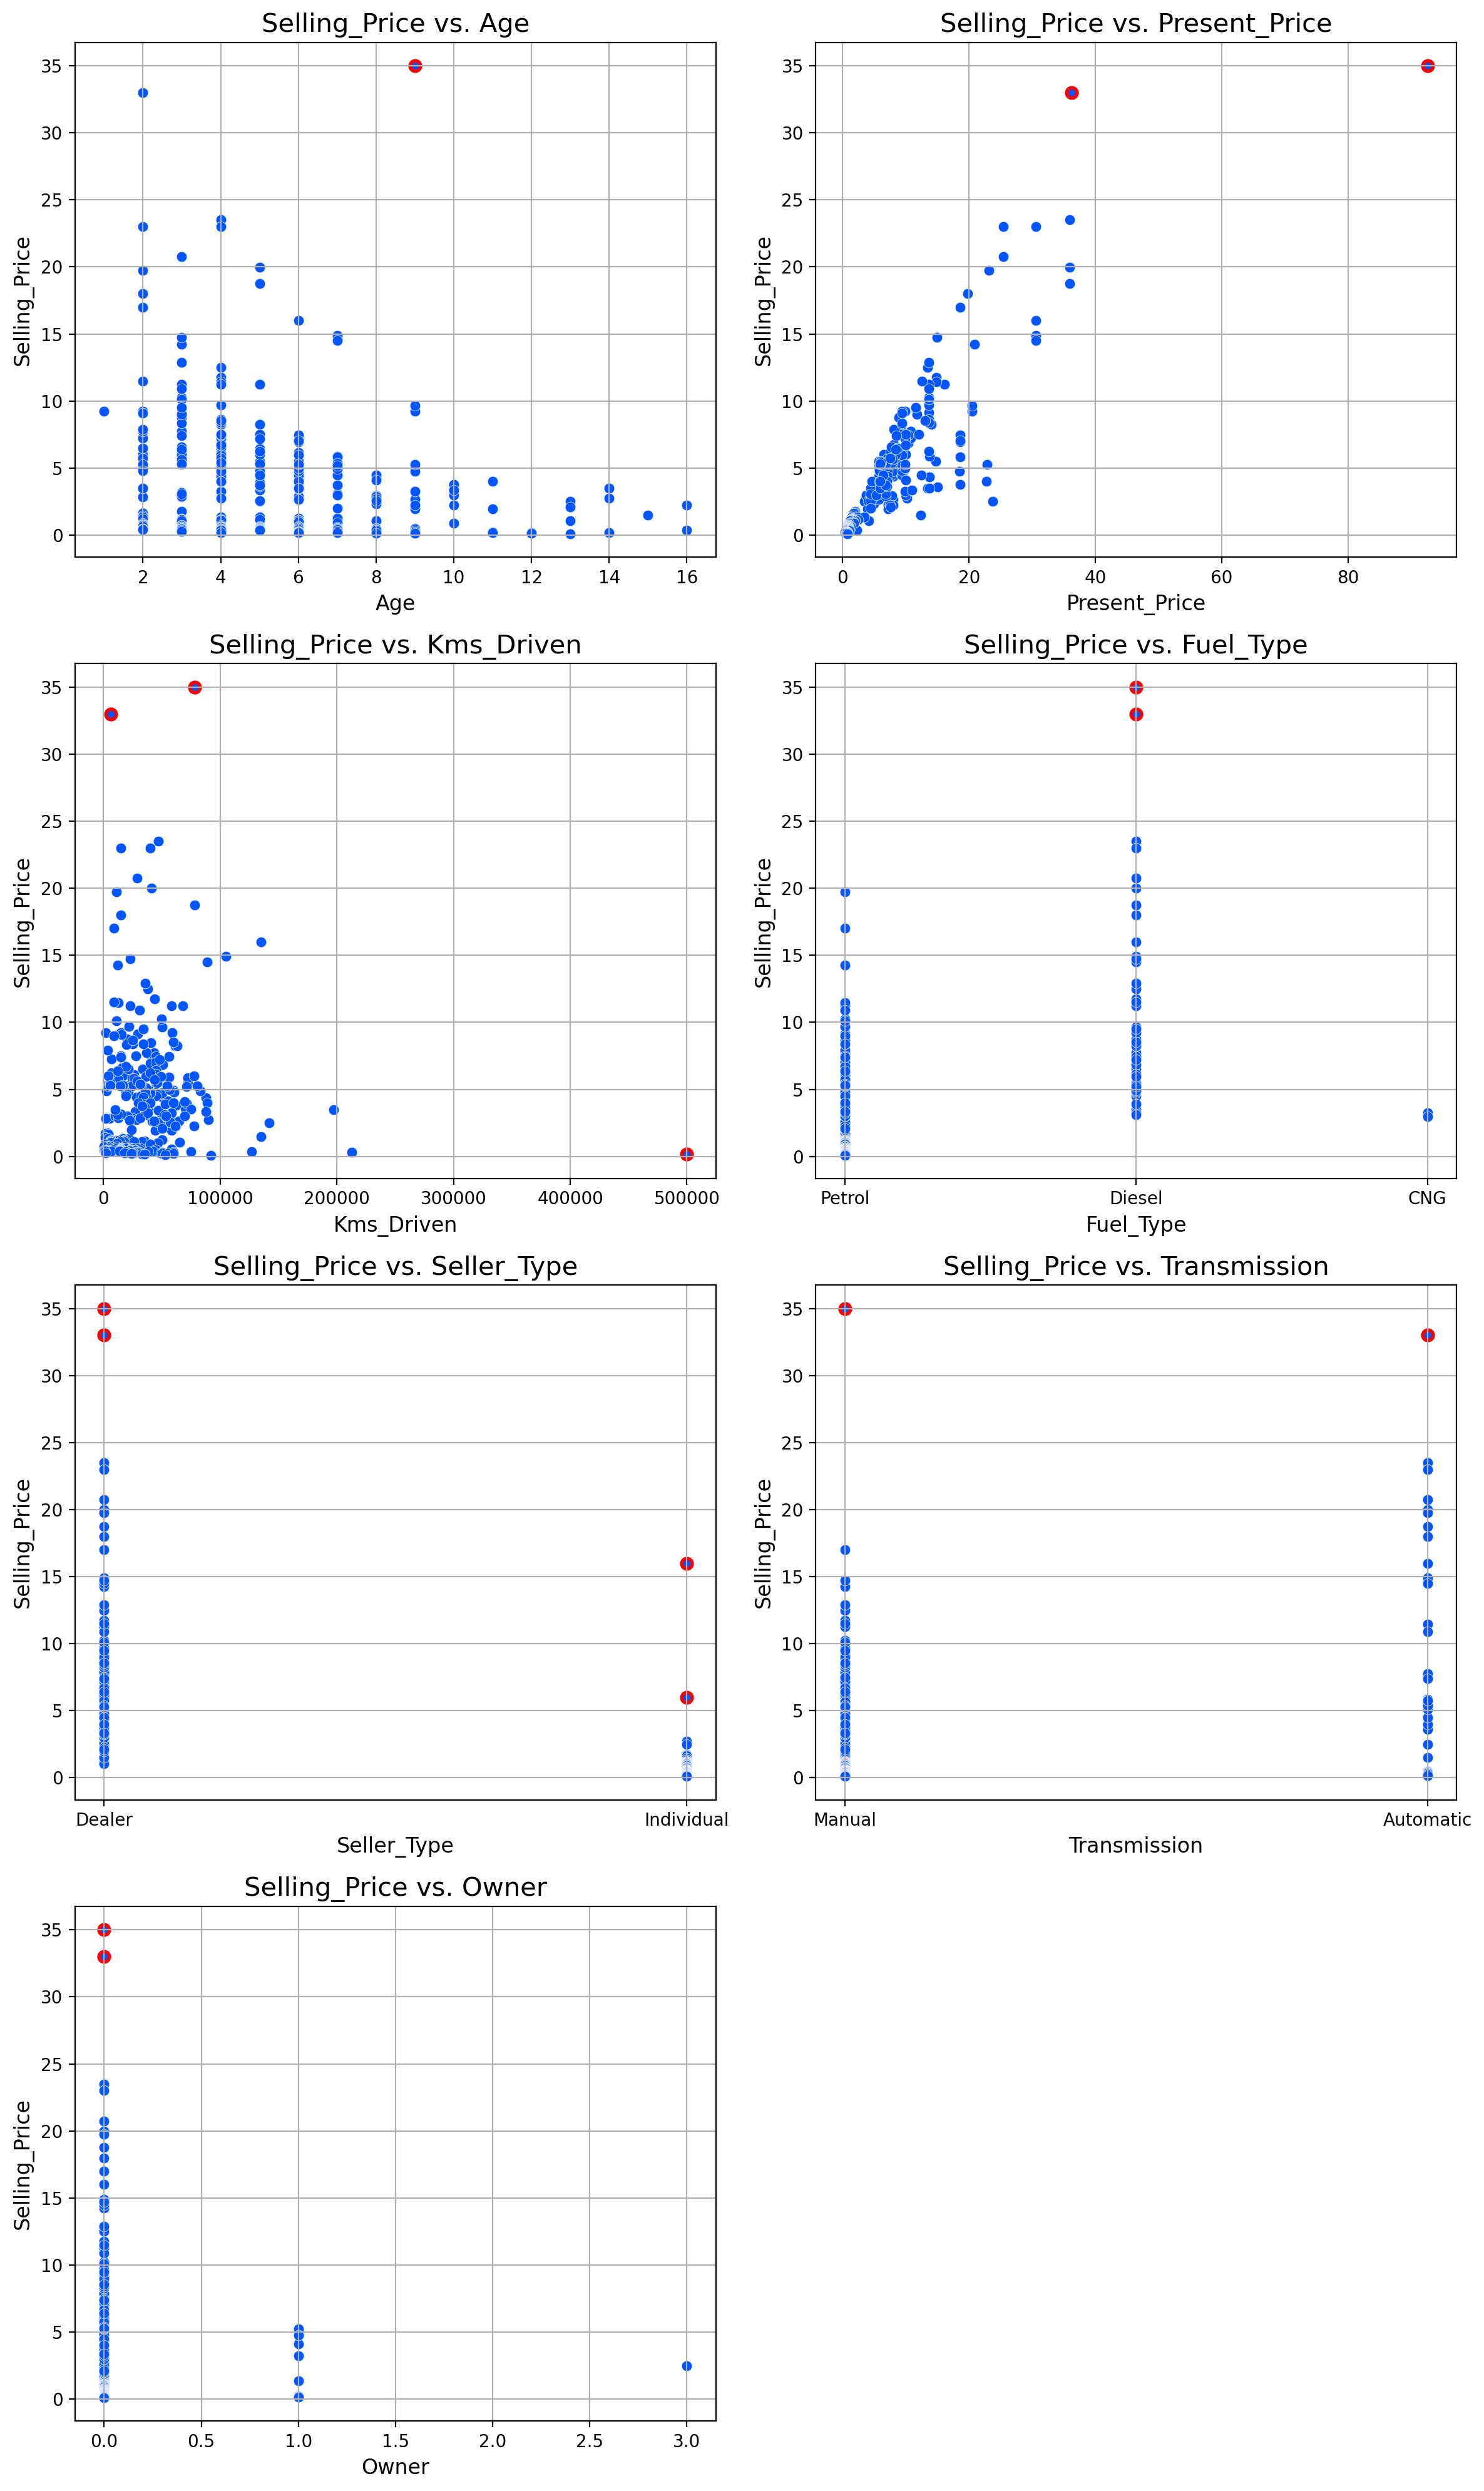

In [14]:
fig, ax = plt.subplots(nrows=4 ,ncols=2, figsize=(12,20), dpi=200)
c = '#0055ff'

target = 'Selling_Price'
features = list(df1.columns)
features.remove(target)

for i in range(len(features)):
    ax[i//2,i%2].scatter(df1[features[i]], df1['Selling_Price'], color=c, edgecolors='w', linewidths=0.25)
    ax[i//2,i%2].set_title('{} vs. {}'.format(target, features[i]), size = 15)
    ax[i//2,i%2].set_xlabel(features[i], size = 12)
    ax[i//2,i%2].set_ylabel(target, size = 12)
    ax[i//2,i%2].grid()


## Distinguish outliers in red: 
outliers_indexes = []

ax[0,0].scatter(df1[df1[target]==35]['Age'], df1[df1[target]==35][target],color=c, edgecolors='r', linewidths=2)
outliers_indexes.extend(list(df1[df1[target]==35].index))

ax[0,1].scatter(df1[df1[target] > 30][features[1]], df1[df1[target] > 30][target], color=c, edgecolors='r',linewidths=2)
outliers_indexes.extend(list(df1[df1[target] > 30].index))

ax[1,0].scatter(df1[df1[target] > 30][features[2]], df1[df1[target] > 30][target], color=c, edgecolors='r', linewidths=2)
outliers_indexes.extend(list(df1[df1[target] > 30].index))

ax[1,0].scatter(df1[df1[features[2]] >= 500000][features[2]], df1[df1[features[2]] >= 500000][target], color=c,
                edgecolors='r', linewidths=2)
outliers_indexes.extend(list(df1[df1[features[2]] >= 500000].index))

ax[1,1].scatter(df1[df1[target] > 30][features[3]], df1[df1[target] > 30][target], color=c, edgecolors='r', linewidths=2)
outliers_indexes.extend(list(df1[df1[target] > 30].index))

ax[2,0].scatter(df1[df1[target] > 30][features[4]], df1[df1[target] > 30][target], color=c, edgecolors='r', linewidths=2)
outliers_indexes.extend(list(df1[df1[target] > 30].index))
ax[2,0].scatter(df1[(df1[features[4]] == 'Individual') & (df1[target] > 5)][features[4]],
           df1[(df1[features[4]] == 'Individual') & (df1[target] > 5)][target], color=c, edgecolors='r', linewidths=2)
outliers_indexes.extend(list(df1[(df1[features[4]] == 'Individual') & (df1[target] > 5)].index))

ax[2,1].scatter(df1[df1[target] > 30][features[5]], df1[df1[target] > 30][target], color=c, edgecolors='r', linewidths=2)
outliers_indexes.extend(list(df1[df1[target] > 30].index))

ax[3,0].scatter(df1[df1[target] > 30][features[6]], df1[df1[target] > 30][target], color=c, edgecolors='r', linewidths=2)
outliers_indexes.extend(list(df1[df1[target] > 30].index))
##

ax[3, 1].axis('off')
plt.tight_layout()
#plt.savefig("Outlier Detection.jpg", dpi=200) 
plt.show()

__Outliers are highlighted in red in the graphs above.__

__Outliers belong to the following indexes of the dataframe:__

In [15]:
outliers_indexes = list(set(outliers_indexes))
outliers_indexes

[64, 196, 53, 86, 27]

## 3.4.1. Removing Outliers
__Since Linear Regression is sensitive to outliers, we remove outliers from the dataset:__

In [16]:
df1.drop(df1.iloc[outliers_indexes].index, inplace=True)
df1.reset_index(inplace=True, drop=True)
df1

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,6,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,8,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,5,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
291,3,9.50,11.60,33988,Diesel,Dealer,Manual,0
292,4,4.00,5.90,60000,Petrol,Dealer,Manual,0
293,10,3.35,11.00,87934,Petrol,Dealer,Manual,0
294,2,11.50,12.50,9000,Diesel,Dealer,Manual,0


__We removed 5 samples from the dataset.__

# 4. Dataset Re-analysis

In [17]:
df1.columns

Index(['Age', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

# 4.1. Univariate Analysis

## 4.1.1. Categorical Variables

In [18]:
categorical_columns = ['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']

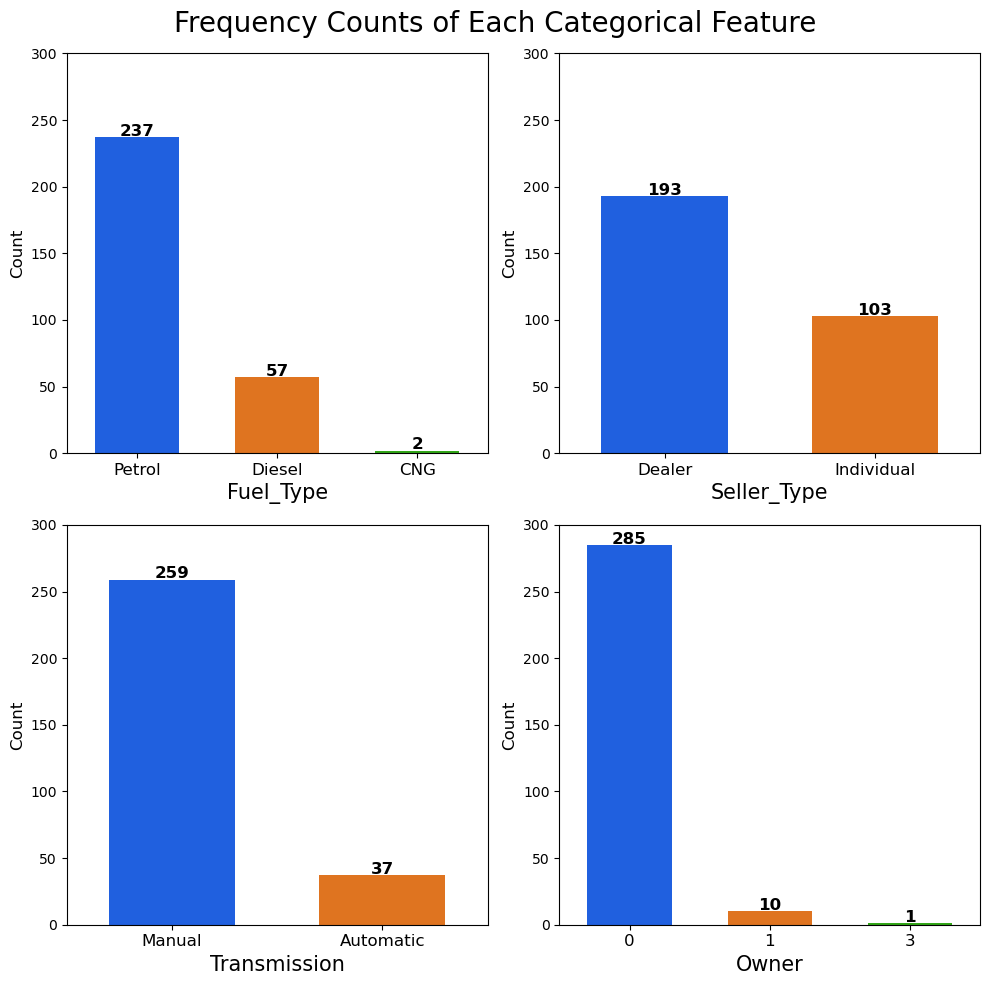

In [19]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10), dpi=100)

colors = ['#0055ff', '#ff7000', '#23bf00']
customPalette = sns.set_palette(sns.color_palette(colors))

# Changing Width of bars in sns.barplot 
def change_width(graph, new_value) :
    for patch in graph.patches :
        current_width = patch.get_width()
        diff = current_width - new_value
        # we change the bar width
        patch.set_width(new_value)
        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)
        
        
for i in range(len(categorical_columns)):
    graph = sns.countplot(x=categorical_columns[i], data=df1, ax=ax[i//2,i%2])
    ax[i//2,i%2].set_xlabel(categorical_columns[i], fontsize=15)
    ax[i//2,i%2].set_ylabel('Count', fontsize=12)
    ax[i//2,i%2].set_ylim([0,300])
    ax[i//2,i%2].set_xticklabels(ax[i//2,i%2].get_xticklabels(), fontsize=12)
    for p in graph.patches:
        graph.annotate('{}'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()+1),
                       ha='center', fontsize=12 ,fontweight="bold")
    change_width(graph,0.6) 
           
        
plt.suptitle('Frequency Counts of Each Categorical Feature', fontsize=20) 
plt.tight_layout()
#plt.savefig("Categorical Features Countplots.jpg", dpi=200)
plt.show()

In [20]:
# return seaborn palette to its defualt value
sns.set_palette("tab10") 

## 4.1.2. Numerical Variables

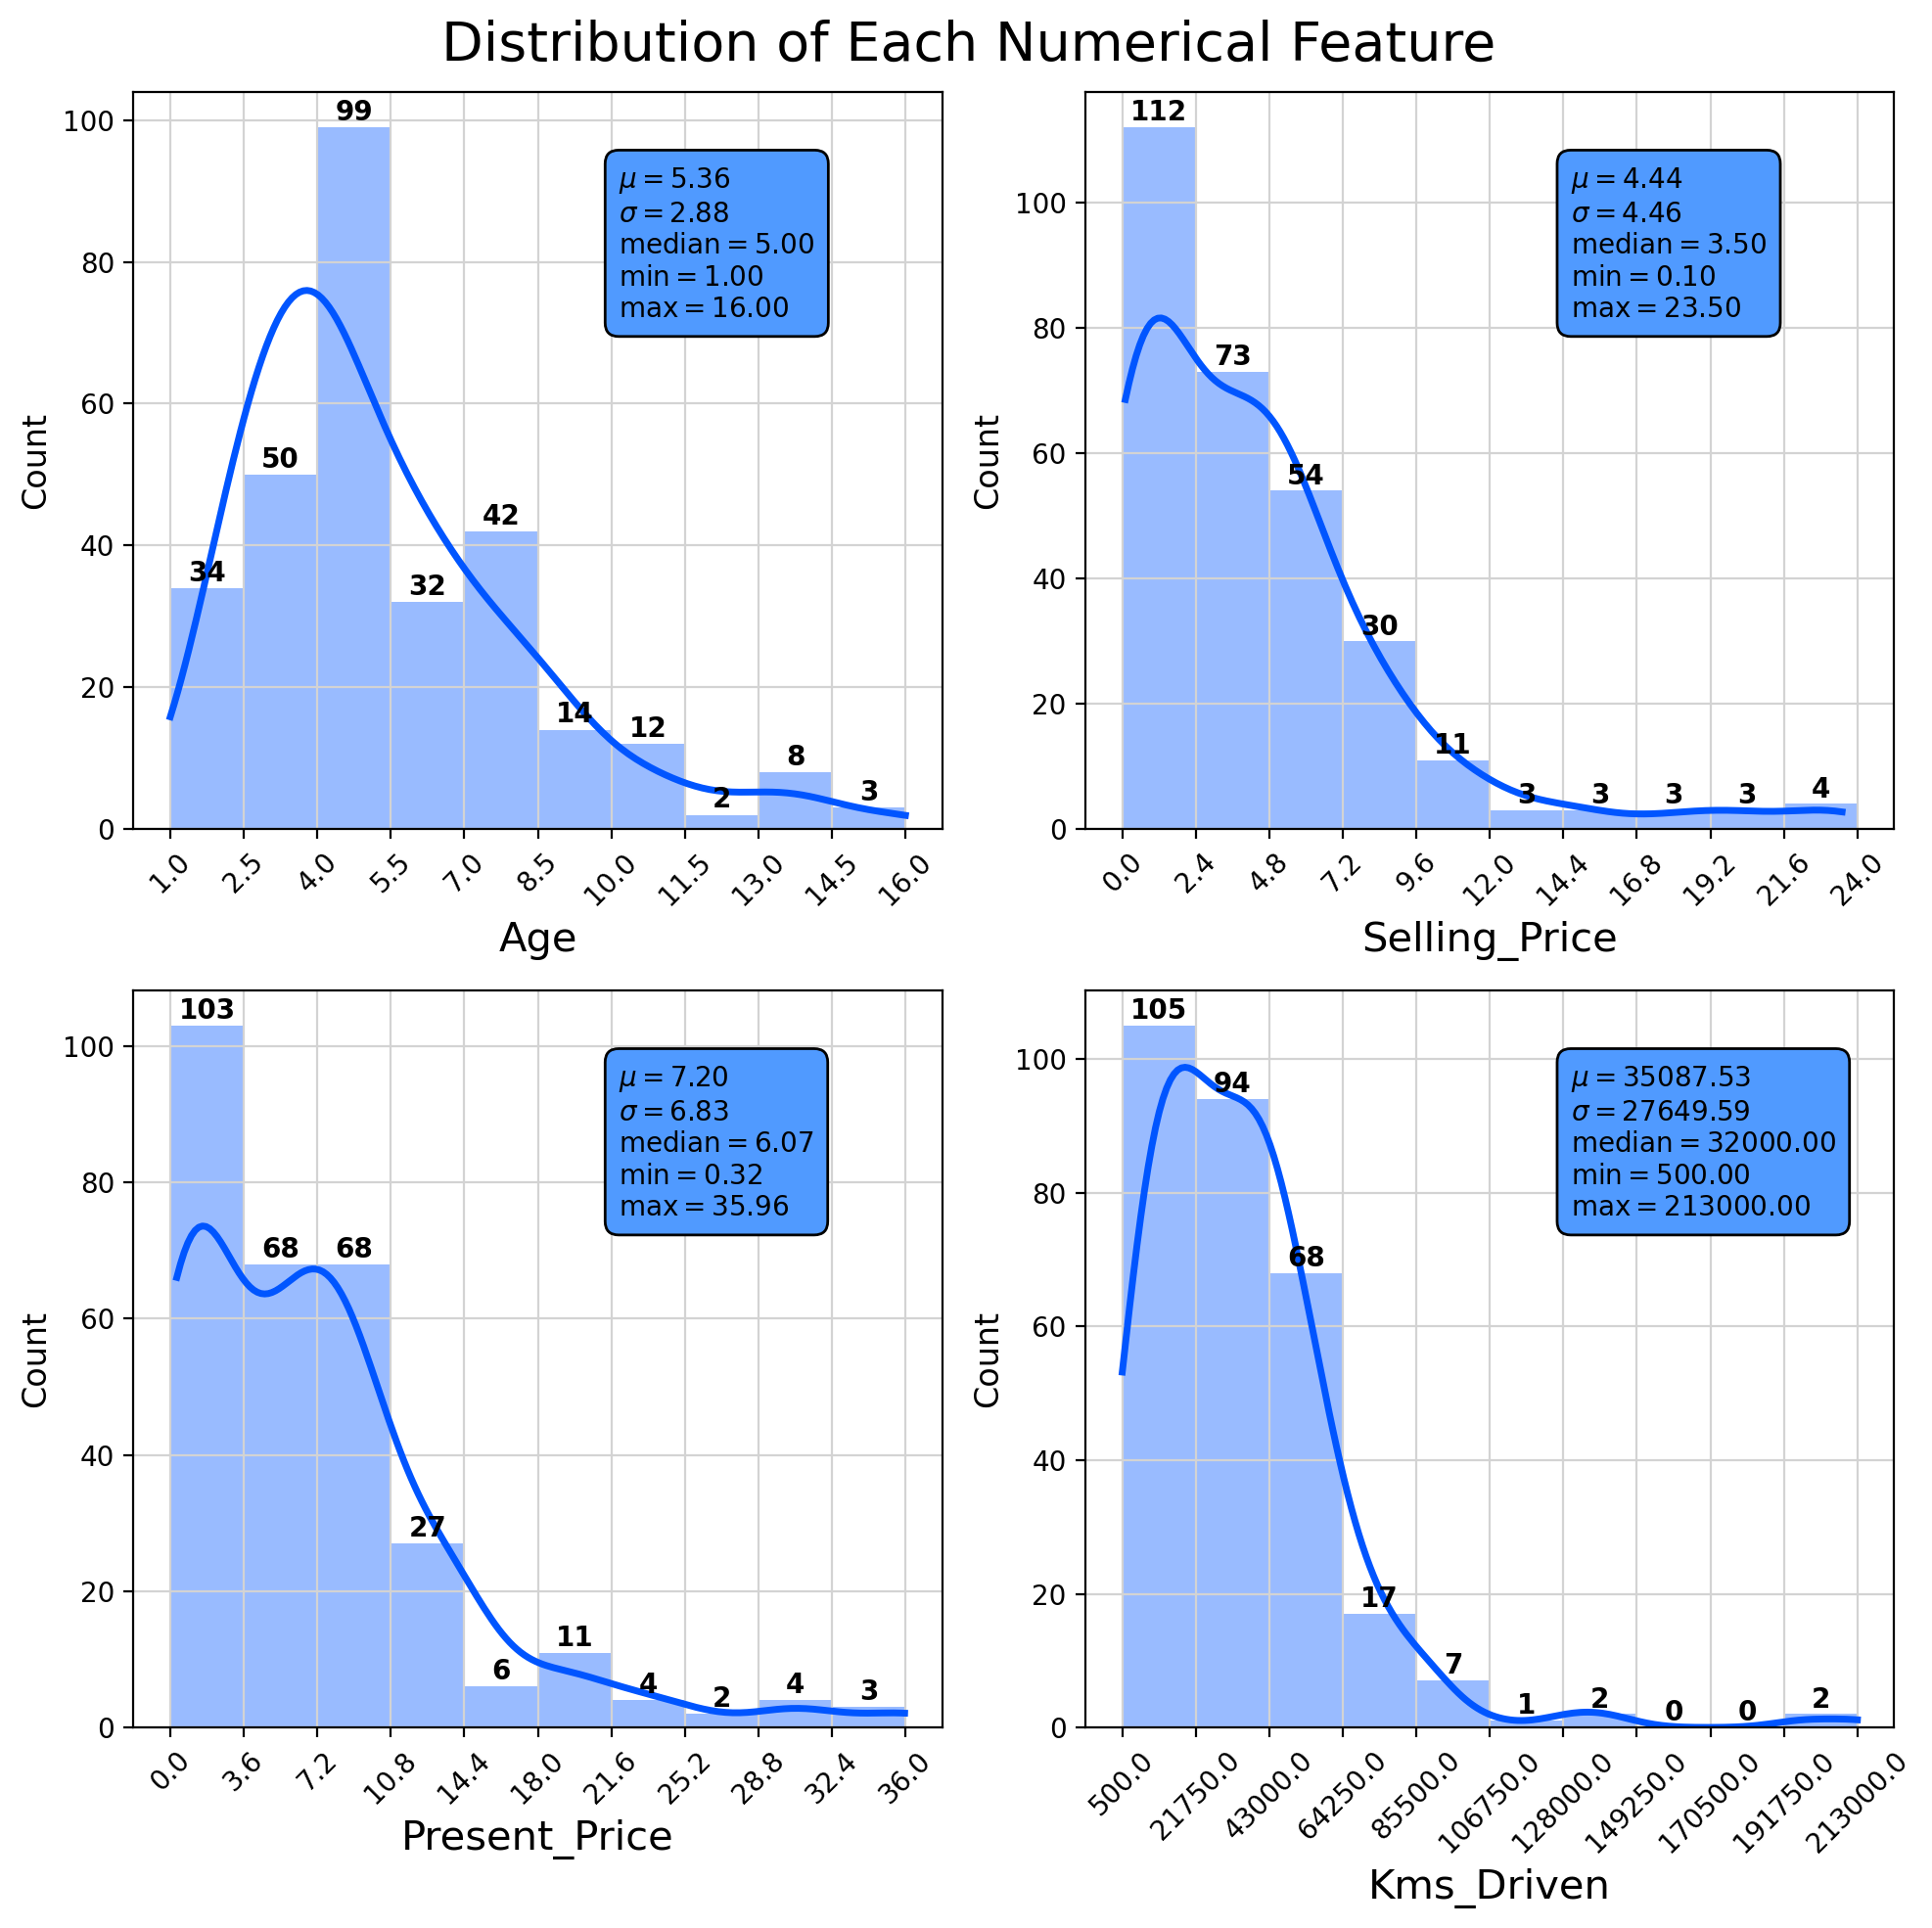

In [21]:
numerical_columns = ['Age', 'Selling_Price', 'Present_Price', 'Kms_Driven']

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10), dpi=200)
c = '#0055ff'

for i in range(len(numerical_columns)):
    values, bin_edges = np.histogram(df1[numerical_columns[i]],
                                range=(np.floor(df1[numerical_columns[i]].min()), np.ceil(df1[numerical_columns[i]].max())))
    graph = sns.histplot(data=df1, x=numerical_columns[i], bins=bin_edges, kde=True, ax=ax[i//2,i%2], edgecolor='none',
                         color=c, alpha=0.4, line_kws={'lw': 2.5})
    ax[i//2,i%2].set_xlabel(numerical_columns[i], fontsize=15)
    ax[i//2,i%2].set_ylabel('Count', fontsize=12)
    ax[i//2,i%2].set_xticks(np.round(bin_edges,1))
    ax[i//2,i%2].set_xticklabels(ax[i//2,i%2].get_xticks(), rotation = 45)
    ax[i//2,i%2].grid(color='lightgrey')
    for j,p in enumerate(graph.patches):
        ax[i//2,i%2].annotate('{}'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()+1),
                       ha='center', fontsize=10 ,fontweight="bold")
    
    textstr = '\n'.join((
    r'$\mu=%.2f$' %df1[numerical_columns[i]].mean(),
    r'$\sigma=%.2f$' %df1[numerical_columns[i]].std(),
    r'$\mathrm{median}=%.2f$' %np.median(df1[numerical_columns[i]]),
    r'$\mathrm{min}=%.2f$' %df1[numerical_columns[i]].min(),
    r'$\mathrm{max}=%.2f$' %df1[numerical_columns[i]].max()
    ))
    ax[i//2,i%2].text(0.6, 0.9, textstr, transform=ax[i//2,i%2].transAxes, fontsize=10, verticalalignment='top',
        bbox=dict(boxstyle='round',facecolor='#509aff', edgecolor='black', pad=0.5))

plt.suptitle('Distribution of Each Numerical Feature', fontsize=20) 
plt.tight_layout()   
#plt.savefig("Numerical Features Histograms.jpg", dpi=200)
plt.show()
                                     
    

__Our variables are almost normally distributed.__

# 4.2. Bivariate Analysis

## 4.2.1. Numerical Features Correlation

In [22]:
df1[numerical_columns].corr()

,Age,Selling_Price,Present_Price,Kms_Driven
Age,1.000000,-0.273328,0.028555,0.626221
Selling_Price,-0.273328,1.000000,0.877711,0.061432
Present_Price,0.028555,0.877711,1.000000,0.336064
Kms_Driven,0.626221,0.061432,0.336064,1.000000


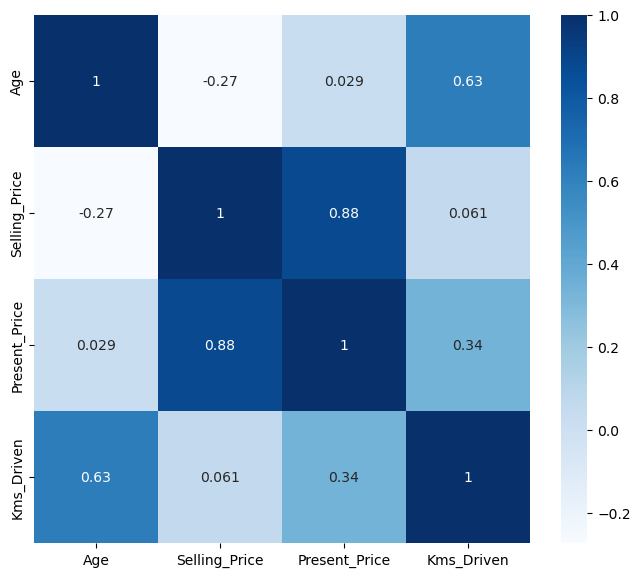

In [23]:
fig, ax = plt.subplots(figsize=(8, 7), dpi=100)
ax = sns.heatmap(df1[numerical_columns].corr(), annot=True, cmap='Blues')
#plt.savefig("Numerical Features Correlation Heatmap.jpg", dpi=200)
plt.show()


__"Present Price" is highly correlated with the target variable "Selling Price".__

__Since features are not highly correlated with each other, we can build our linear regression model based on these features.__

## 4.2.2. Target vs. Numerical Features Analysis

__We are going to plot Selling_Price vs. numerical features including Present_Price and Kms_Driven and Age:__

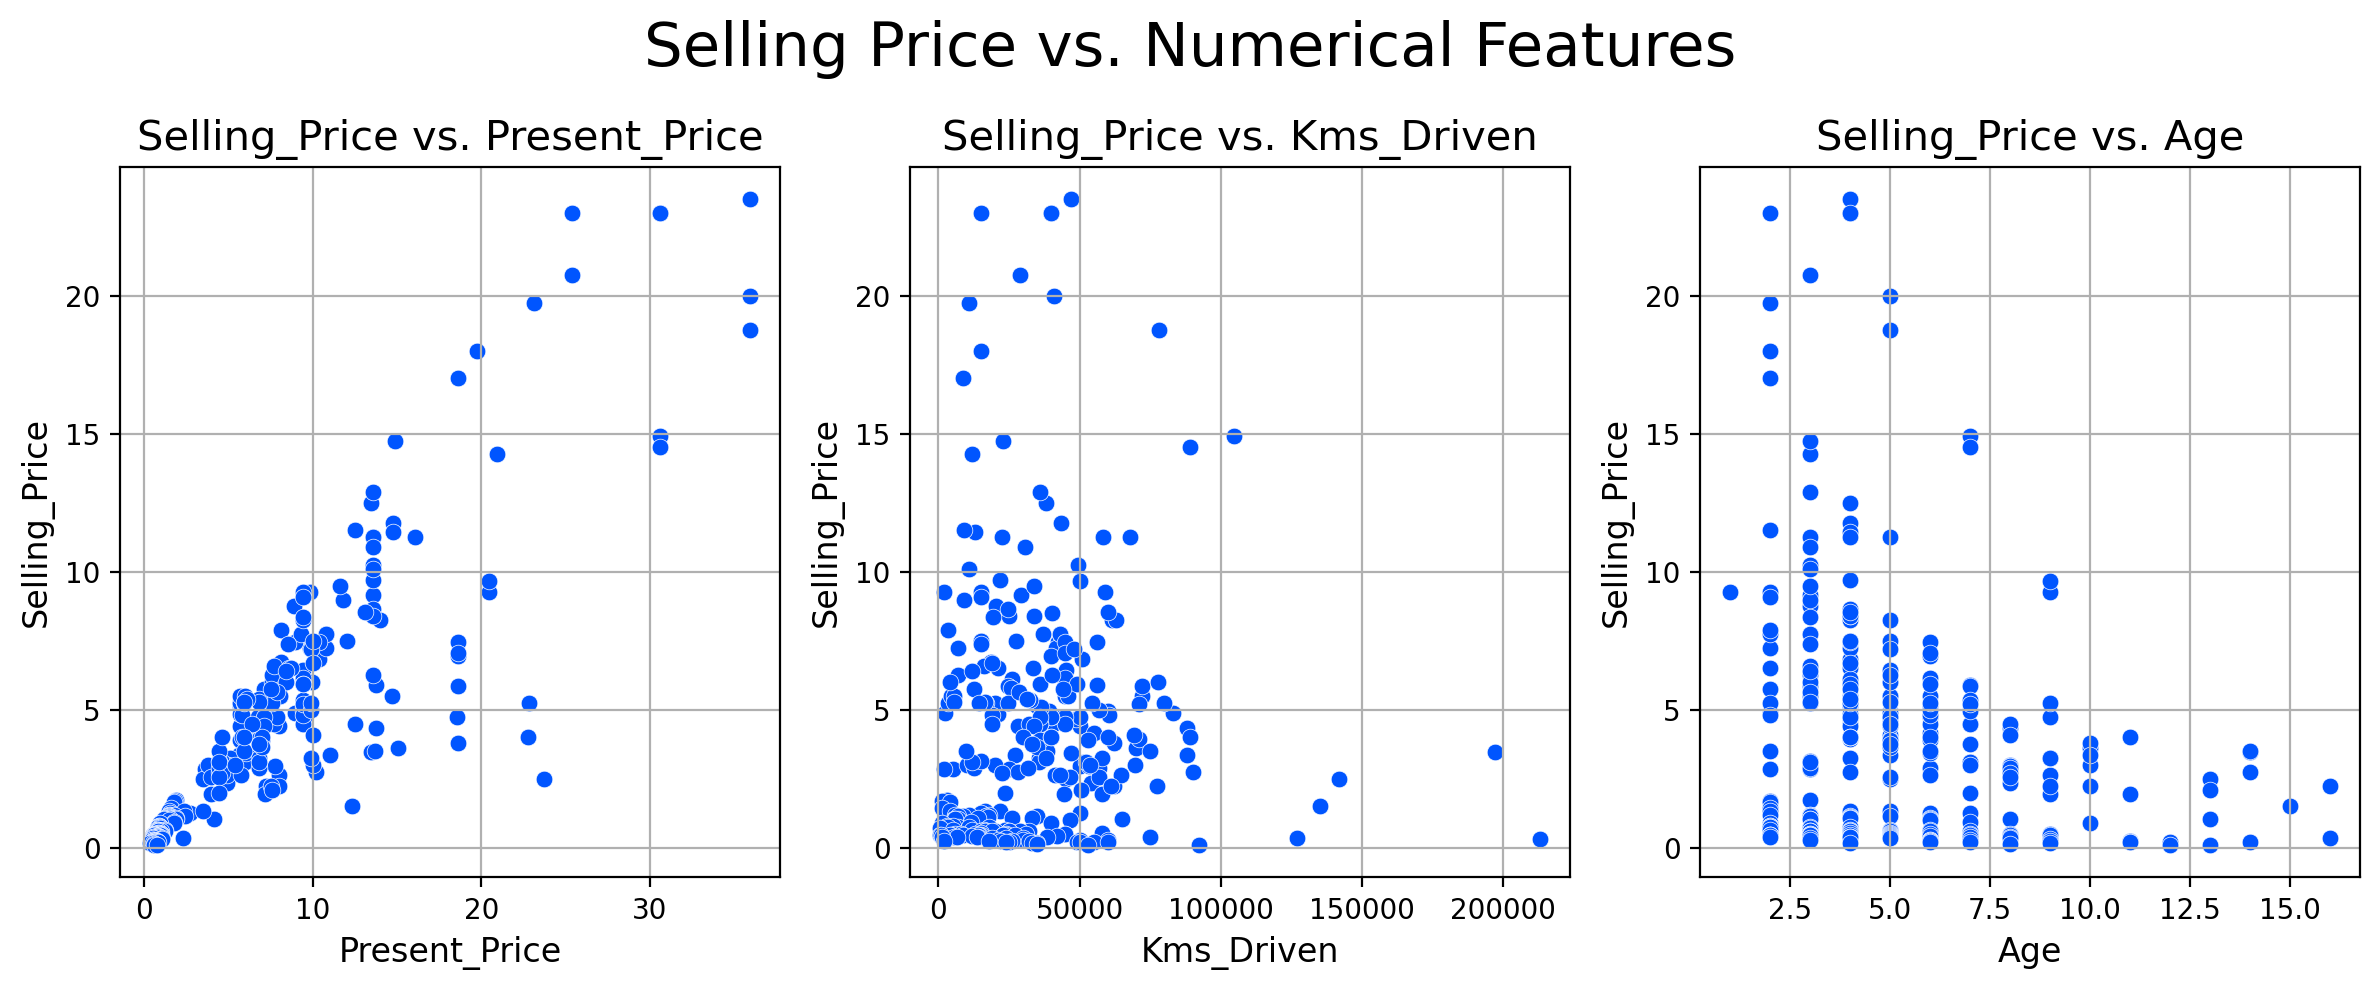

In [24]:
fig, ax = plt.subplots(nrows=1 ,ncols=3, figsize=(12,5), dpi=200)

num_features = ['Present_Price', 'Kms_Driven', 'Age']
target = 'Selling_Price'
c = '#0055ff'

for i in range(len(num_features)):
    ax[i].scatter(df1[num_features[i]], df1[target], color=c, edgecolors='w', linewidths=0.25)
    ax[i].set_title('{} vs. {}'.format(target, num_features[i]), size = 15)
    ax[i].set_xlabel(num_features[i], size = 12)
    ax[i].set_ylabel(target, size = 12)
    ax[i].grid()

plt.suptitle('Selling Price vs. Numerical Features', size = 22)
plt.tight_layout()
#plt.savefig("Target vs. Numerical Features Analysis.jpg", dpi=200)
plt.show()

__Conclusion:__

* __As the Present_Price increases, the Selling_Price of the car increases. So the Selling_Price is directly proportional to the Present_Price.__

* __As the car's Kms_Driven increases, its Selling_Price decreases. So the Selling_Price is inversely proportional to the Kms_Driven.__

* __As the car ages, its Selling_Price decreases. So the Selling_Price is inversely proportional to the Age of the car.__

## 4.2.3. Target vs. Categorical Features Analysis

__We are going to plot Selling_Price vs. categorical features including Fuel_Type, Seller_Type, Transmission and Age:__

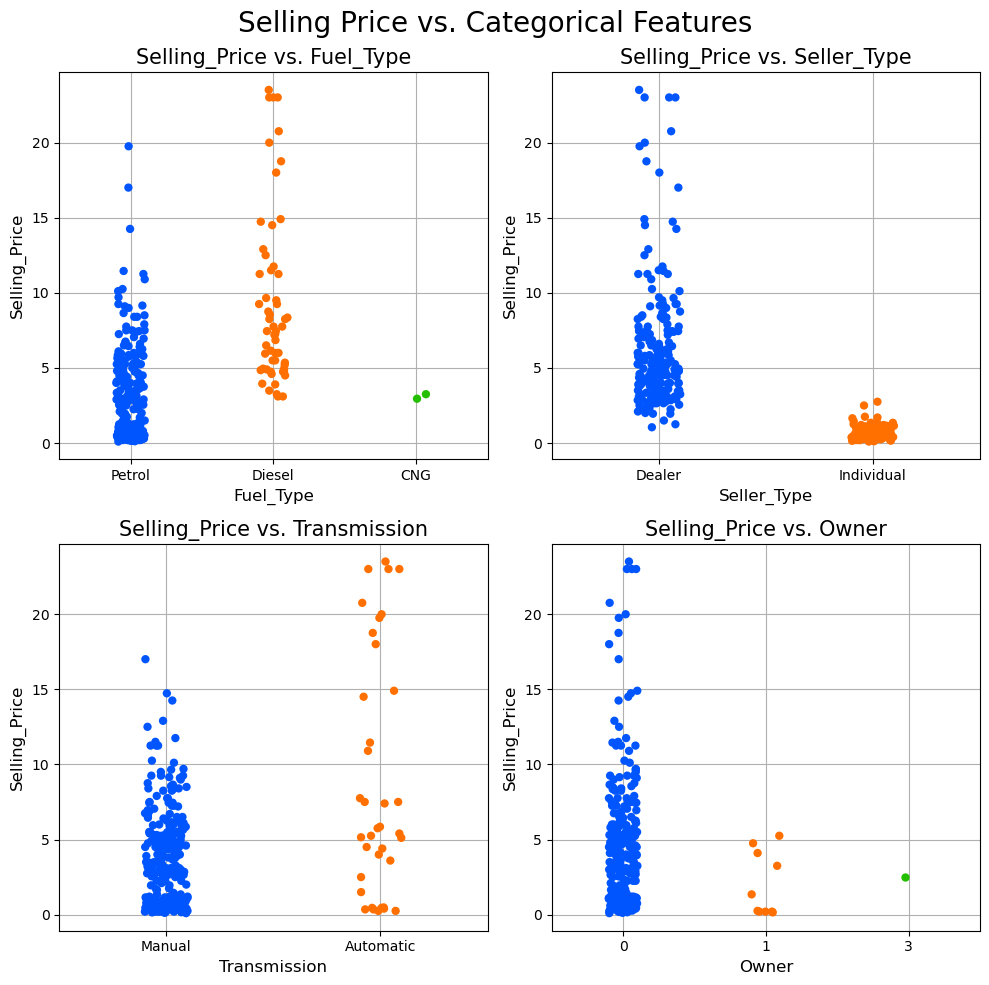

In [25]:
fig, axes = plt.subplots(nrows=2 ,ncols=2, figsize=(10,10), dpi=100)
cat_features = ['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']
target = 'Selling_Price'

colors = ['#0055ff', '#ff7000', '#23bf00']
customPalette = sns.set_palette(sns.color_palette(colors))

for i in range(len(cat_features)):
    sns.stripplot(ax=axes[i//2,i%2], x=cat_features[i], y=target, data=df1, size=6) #, color=colors[i]
    axes[i//2,i%2].set_title('{} vs. {}'.format(target, cat_features[i]), size = 15)
    axes[i//2,i%2].set_xlabel(cat_features[i], size = 12)
    axes[i//2,i%2].set_ylabel(target, size = 12)
    axes[i//2,i%2].grid()

plt.suptitle('Selling Price vs. Categorical Features', size = 20)
plt.tight_layout()
#plt.savefig("Target vs. Categorical Features Analysis.jpg", dpi=200)
plt.show()

__Conclusion:__

* __Diesel Cars > CNG Cars > Petrol Cars in terms of Selling_Price.__
* __The Selling_Price of cars sold by individuals is lower than the price of cars sold by dealers.__
* __Automatic cars are more expensive than manual cars.__
* __Cars with fewer previous owners are more expensive.__

# 4.3. Multivariate Analysis

__We are going to plot Selling_Price vs. Present_Price displaying different subsets for categorical features including Fuel_Type, Seller_Type and Transmission:__

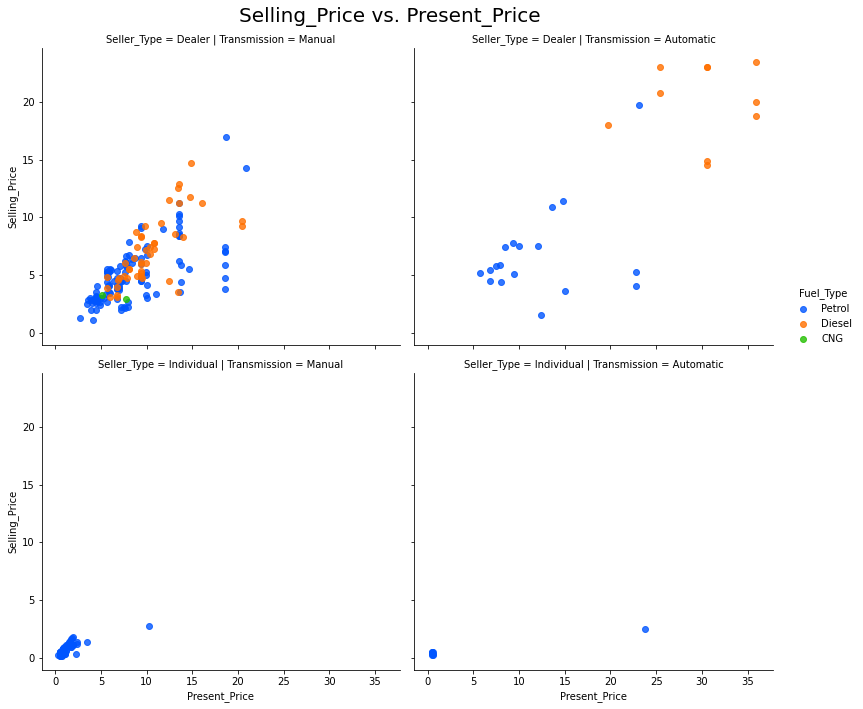

In [26]:
colors = ['#0055ff', '#ff7000', '#23bf00']
customPalette = sns.set_palette(sns.color_palette(colors))

graph = sns.lmplot(x='Present_Price', y='Selling_Price', data= df1, fit_reg=False,
           row='Seller_Type', col='Transmission', hue='Fuel_Type')   

plt.suptitle('Selling_Price vs. Present_Price', fontsize=20) 
sns.move_legend(graph, "lower center", bbox_to_anchor=(1.05, 0.5), ncol=1)
   
plt.tight_layout()
plt.show()

__Conclusion:__
* __All of the Individual Seller_Type have had Petrol cars.__ 
* __Diesel cars all have belonged to the Dealer Seller_Type.__
* __All of the CNG cars have had Manual Transmission and have belonged to Dealer Seller_Type.__

In [27]:
# return seaborn palette to its default value
sns.set_palette("tab10") 

# 5. Linear Regression Model
__Car datset:__

In [28]:
df1

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,6,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,8,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,5,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
291,3,9.50,11.60,33988,Diesel,Dealer,Manual,0
292,4,4.00,5.90,60000,Petrol,Dealer,Manual,0
293,10,3.35,11.00,87934,Petrol,Dealer,Manual,0
294,2,11.50,12.50,9000,Diesel,Dealer,Manual,0


### Pre-processing :
__We add the only data given for prediction in the last row of the dataframe:__

In [29]:
sample = {'Age': 10, 'Selling_Price':0, 'Present_Price':11.23, 'Kms_Driven':42000, 'Fuel_Type':'Petrol',
          'Seller_Type':'Dealer', 'Transmission':'Manual', 'Owner':1 }
df1 = df1.append(sample, ignore_index=True)
df1

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,6,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,8,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,5,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
292,4,4.00,5.90,60000,Petrol,Dealer,Manual,0
293,10,3.35,11.00,87934,Petrol,Dealer,Manual,0
294,2,11.50,12.50,9000,Diesel,Dealer,Manual,0
295,3,5.30,5.90,5464,Petrol,Dealer,Manual,0


__We set the Selling Price for the given data to zero, but after training the model, we estimate the target value for this data.__

# 5.1. Linear Regression Model 1 (Simple Model)

## 5.1.1. Pre-processing
__We group together the low frequency values in a single bin for Owner feature:__

In [30]:
df2 = df1.copy()

df2.loc[df2[df2['Owner']>1].index, 'Owner'] = 1
df2['Owner'].value_counts()

0    285
1     12
Name: Owner, dtype: int64

__Samples(cars) with more equal than one previous owners make up only 3.7 percent of the data set, so we categorized these samples into one category with the value of 1. Therefore, we consider Owner as a categorical feature with two values of 0 and 1.__

__This will prevent the model from overfitting since we want to use dummy encoding below.__

## 5.1.2. Categorical Variables Encoding : Implementing Dummy Encoding
__Before building our model, we implement dummy encoding on categorical columns:__

In [31]:
categorical_columns = ['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']

df2 = pd.get_dummies(df2, columns=categorical_columns, drop_first=True)
df2

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Owner_1
0,5,3.35,5.59,27000,0,1,0,1,0
1,6,4.75,9.54,43000,1,0,0,1,0
2,2,7.25,9.85,6900,0,1,0,1,0
3,8,2.85,4.15,5200,0,1,0,1,0
4,5,4.60,6.87,42450,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
292,4,4.00,5.90,60000,0,1,0,1,0
293,10,3.35,11.00,87934,0,1,0,1,0
294,2,11.50,12.50,9000,1,0,0,1,0
295,3,5.30,5.90,5464,0,1,0,1,0


## 5.1.3. Building Model 1

In [32]:
X = df2.drop('Selling_Price', axis=1)
y = df2['Selling_Price']

__Number of samples using for building and evaluating the linear regression model (indexes 0 to 295):__

In [33]:
df2.shape[0]-1

296

__We set test_size to 30% of the dataset:__

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X[:df2.shape[0]-1], y[:df2.shape[0]-1], test_size=0.3, random_state=0)

In [35]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(207, 8)
(89, 8)
(207,)
(89,)


In [36]:
Model1 = LinearRegression()
Model1.fit(X_train, y_train.values.reshape(-1,1))

print(Model1.intercept_)
print(Model1.coef_)

[2.89843213]
[[-2.70845292e-01  4.99076852e-01 -2.05260794e-05  2.15021950e+00
   4.35615773e-01 -7.85756674e-01 -4.97469021e-01 -2.68623759e-01]]


## 5.1.4. Evaluating the Model using Simple Train/Test Split

In [37]:
y_pred = Model1.predict(X_test)

In [38]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 1.0623341010253162
Mean Squared Error: 2.4198772745280266
Root Mean Squared Error: 1.5555954726496302
R2 Score: 0.8844884298682328


__The model performs well!__

__R2_Score = 0.884__

## 5.1.5. Evaluating the Model using Cross-Validation

In [39]:
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2']
kf = KFold(n_splits=5, shuffle=True, random_state=0)
result1 = cross_validate(Model1, X[:df2.shape[0]-1], y[:df2.shape[0]-1], cv=kf, return_train_score=True, scoring=scoring)

print('The Average Value of Mean Absolute Errors:', -result1['test_neg_mean_absolute_error'].mean())
print('The Average Value of Mean Squared Errors:', -result1['test_neg_mean_squared_error'].mean())
print('The Average Value of Root Mean Squared Errors:', -result1['test_neg_root_mean_squared_error'].mean())
print('The Average Value of R2 Scores:', result1['test_r2'].mean())

The Average Value of Mean Absolute Errors: 1.085584672060212
The Average Value of Mean Squared Errors: 2.5749418656304135
The Average Value of Root Mean Squared Errors: 1.5954059618234429
The Average Value of R2 Scores: 0.8660403606510183


__By using cross-validation, we can  have more confidence in our estimation for the model evaluation metrics than the former simple train/test split:__
* __MAE = 1.086__
* __MSE = 2.575__
* __RMSE = 1.595__
* __R2_Score = 0.866__

__As can be seen, the values obtained for the model evaluation metrics using cross-validation are almost similar to the values obtained using the former simple train/test split.__

__So we can also use the simple train/test split in order to measure how good our model is.__



____
# 5.2. Linear Regression Model 2 
__We try to improve Model1 by rescaling the dataset using StandardScaler:__

## 5.2.1. Rescaling the Dataset using StandardScaler

In [40]:
Scaler_X = StandardScaler()
X_train_scaled = Scaler_X.fit_transform(X_train)
X_test_scaled = Scaler_X.transform(X_test)

Scaler_y = StandardScaler()
y_train_scaled = Scaler_y.fit_transform(y_train.values.reshape(-1,1))

__After applying the StandardScaler transformation, outputs are numpy arrays!__

__So X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled are numpy arrays.__

## 5.2.2. Training Model 2

In [41]:
Model2 = LinearRegression()
Model2.fit(X_train_scaled , y_train_scaled)

print(Model2.intercept_)
print(Model2.coef_)

[-1.41582283e-16]
[[-0.17585457  0.78514398 -0.12600999  0.19621057  0.04046256 -0.08695584
  -0.03579584 -0.01254273]]


## 5.2.3. Evaluating Model 2 using Simple Train/Test Split

In [42]:
y_pred_scaled = Model2.predict(X_test_scaled)

In [43]:
y_pred = Scaler_y.inverse_transform(y_pred_scaled)

In [44]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 1.0623341010252623
Mean Squared Error: 2.419877274525888
Root Mean Squared Error: 1.555595472648943
R2 Score: 0.8844884298683349


__As can be seen, by applying StandardScaling, our evaluation metrics values have not changed much:__

* Mean Absolute Error = __1.062__

* Mean Squared Error = __2.420__

* Root Mean Squared Error = __1.556__

* R2 Score = __0.884__

## 5.2.4. Evaluating Model 2 using Cross-Validation and Pipeline:

In [45]:
pipeline = make_pipeline(StandardScaler(),  LinearRegression())

kf = KFold(n_splits=5, shuffle=True, random_state=0) 
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2']
results2 = cross_validate(pipeline, X[:df2.shape[0]-1], y[:df2.shape[0]-1], cv=kf, return_train_score=True, scoring=scoring)

print('The Average Value of Mean Absolute Errors:', -results2['test_neg_mean_absolute_error'].mean())
print('The Average Value of Mean Squared Errors:', -results2['test_neg_mean_squared_error'].mean())
print('The Average Value of Root Mean Squared Errors:', -results2['test_neg_root_mean_squared_error'].mean())
print('The Average Value of R2 Scores:', results2['test_r2'].mean())

The Average Value of Mean Absolute Errors: 1.0855846720610276
The Average Value of Mean Squared Errors: 2.5749418656344525
The Average Value of Root Mean Squared Errors: 1.5954059618246867
The Average Value of R2 Scores: 0.8660403606508172


* __By using cross-validation, we can be more confident in our estimation of the model evaluation metrics.__ 

* __It is very important that StandardScaler transformation should only be learnt from the training folds, otherwise it will lead to data leakage during preprocessing. Pipeline is a great way to prevent data leakage as it ensures that the appropriate method is performed on the correct data subset. This is ideal for use in cross-validation since it ensures that only the training fold are used when performing fit and the test set (validation set) is used only for calculating the accuracy score in each iteration of cross-validation.__

* __The values obtained for the evaluation metrics in this model are approximately equal to the previous model (Model 1), which indicates that using StandardScaler has not improved model performance.__


__Our model evaluation has so far concluded:__

### R2_Score = 0.866

____
# 5.3. Linear Regression Model 3 
__We try to improve Model2 by checking and removing folds with poor performance using cross-validation:__

## 5.3.1. Checking Model 2 using Cross-Validation

In [46]:
kf = KFold(10)
results2 = cross_validate(Model2, X_train_scaled, y_train_scaled, cv=kf, return_train_score=True)

In [47]:
results2['test_score']

array([0.95835579, 0.89048716, 0.87214548, 0.81221609, 0.80246707,
       0.92297082, 0.77048865, 0.86393312, 0.83984858, 0.89421795])

__As can be seen, Model2 performed weaker on the 7th fold than the others. In other words, this fold is inconsistent with the rest of the dataset.__

In [48]:
# kf.split(...) returns the training set indices and test set indices for each split
f=1
print('Fold indexes:')
for train_indexes, test_indexes in kf.split(X_train_scaled, y_train_scaled):
    print('Fold {}: (index {} to {})'.format(f,test_indexes.min(),test_indexes.max()))
    #print('{}\n'.format(test_indexes))
    f += 1

Fold indexes:
Fold 1: (index 0 to 20)
Fold 2: (index 21 to 41)
Fold 3: (index 42 to 62)
Fold 4: (index 63 to 83)
Fold 5: (index 84 to 104)
Fold 6: (index 105 to 125)
Fold 7: (index 126 to 146)
Fold 8: (index 147 to 166)
Fold 9: (index 167 to 186)
Fold 10: (index 187 to 206)


__We obtained the indexes for each fold. Next we try to remove this fold and train the model on the rest of the training set:__

In [49]:
X_trained_new = np.concatenate((X_train_scaled[:126,:],X_train_scaled[147:,:]))
y_trained_new = np.concatenate((y_train_scaled[:126,:],y_train_scaled[147:,:]))

In [50]:
print(X_trained_new.shape)
print(y_trained_new.shape)

(186, 8)
(186, 1)


## 5.3.2. Training Model 3
__We try to train a new model (Model 3) on the rest of the training set:__

In [51]:
Model3 = LinearRegression()
Model3.fit(X_trained_new, y_trained_new)

print(Model3.intercept_)
print(Model3.coef_)

[0.01277969]
[[-0.17675925  0.83596168 -0.09800377  0.1821143   0.03036425 -0.04422586
  -0.04228666  0.02720831]]


## 5.3.3. Evaluating Model 3 using Simple Train/Test Split

In [52]:
y_pred_new = Model3.predict(X_test_scaled)

In [53]:
y_pred = Scaler_y.inverse_transform(y_pred_new)

In [54]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 1.0894473165051668
Mean Squared Error: 2.4906227039862476
Root Mean Squared Error: 1.5781706827799862
R2 Score: 0.8811114339674968


__As can be seen, the values of our evaluation metrics have not changed much.__

____
# 5.4. Linear Regression Model 4 
__In order to overcome under-fitting and improve Model2 performance, we try to increase the complexity of the model by adding all of the second-order terms of the features.__

## 5.4.1. Creating Second-order Polynomial Features

In [55]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

X_poly = poly_features.fit_transform(X)

X_Poly = pd.DataFrame(X_poly, columns=poly_features.get_feature_names(X.columns))

X_Poly

,Age,Present_Price,Kms_Driven,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Owner_1,Age^2,Age Present_Price,...,Fuel_Type_Petrol^2,Fuel_Type_Petrol Seller_Type_Individual,Fuel_Type_Petrol Transmission_Manual,Fuel_Type_Petrol Owner_1,Seller_Type_Individual^2,Seller_Type_Individual Transmission_Manual,Seller_Type_Individual Owner_1,Transmission_Manual^2,Transmission_Manual Owner_1,Owner_1^2
0,5.0,5.59,27000.0,0.0,1.0,0.0,1.0,0.0,25.0,27.95,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,6.0,9.54,43000.0,1.0,0.0,0.0,1.0,0.0,36.0,57.24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2.0,9.85,6900.0,0.0,1.0,0.0,1.0,0.0,4.0,19.70,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,8.0,4.15,5200.0,0.0,1.0,0.0,1.0,0.0,64.0,33.20,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5.0,6.87,42450.0,1.0,0.0,0.0,1.0,0.0,25.0,34.35,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,4.0,5.90,60000.0,0.0,1.0,0.0,1.0,0.0,16.0,23.60,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
293,10.0,11.00,87934.0,0.0,1.0,0.0,1.0,0.0,100.0,110.00,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
294,2.0,12.50,9000.0,1.0,0.0,0.0,1.0,0.0,4.0,25.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
295,3.0,5.90,5464.0,0.0,1.0,0.0,1.0,0.0,9.0,17.70,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [56]:
poly_features.get_feature_names(X.columns)

['Age',
 'Present_Price',
 'Kms_Driven',
 'Fuel_Type_Diesel',
 'Fuel_Type_Petrol',
 'Seller_Type_Individual',
 'Transmission_Manual',
 'Owner_1',
 'Age^2',
 'Age Present_Price',
 'Age Kms_Driven',
 'Age Fuel_Type_Diesel',
 'Age Fuel_Type_Petrol',
 'Age Seller_Type_Individual',
 'Age Transmission_Manual',
 'Age Owner_1',
 'Present_Price^2',
 'Present_Price Kms_Driven',
 'Present_Price Fuel_Type_Diesel',
 'Present_Price Fuel_Type_Petrol',
 'Present_Price Seller_Type_Individual',
 'Present_Price Transmission_Manual',
 'Present_Price Owner_1',
 'Kms_Driven^2',
 'Kms_Driven Fuel_Type_Diesel',
 'Kms_Driven Fuel_Type_Petrol',
 'Kms_Driven Seller_Type_Individual',
 'Kms_Driven Transmission_Manual',
 'Kms_Driven Owner_1',
 'Fuel_Type_Diesel^2',
 'Fuel_Type_Diesel Fuel_Type_Petrol',
 'Fuel_Type_Diesel Seller_Type_Individual',
 'Fuel_Type_Diesel Transmission_Manual',
 'Fuel_Type_Diesel Owner_1',
 'Fuel_Type_Petrol^2',
 'Fuel_Type_Petrol Seller_Type_Individual',
 'Fuel_Type_Petrol Transmission_Man

In [57]:
len(poly_features.get_feature_names(X.columns))

44

__With the construction of second-order features, the number of dataframe features has increased to 44 !__

## 5.4.2. Defining the Training and Test Sets

In [58]:
X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X_Poly[:len(df2)-1], y[:len(df2)-1], 
                                                                        test_size=0.3, random_state=0)

In [59]:
print(X_poly_train.shape)
print(y_poly_train.shape)
print(X_poly_test.shape)
print(y_poly_test.shape)

(207, 44)
(207,)
(89, 44)
(89,)


In [60]:
df4 = pd.concat([pd.concat([X_poly_train, X_poly_test, X_Poly.tail(1)]), pd.concat([y_poly_train, y_poly_test, y.tail(1)])]
                , axis=1)

df4.reset_index(drop= True, inplace=True)
df4

,Age,Present_Price,Kms_Driven,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Owner_1,Age^2,Age Present_Price,...,Fuel_Type_Petrol Seller_Type_Individual,Fuel_Type_Petrol Transmission_Manual,Fuel_Type_Petrol Owner_1,Seller_Type_Individual^2,Seller_Type_Individual Transmission_Manual,Seller_Type_Individual Owner_1,Transmission_Manual^2,Transmission_Manual Owner_1,Owner_1^2,Selling_Price
0,2.0,0.95,1300.0,0.0,1.0,1.0,1.0,0.0,4.0,1.90,...,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.90
1,6.0,0.57,18000.0,0.0,1.0,1.0,1.0,0.0,36.0,3.42,...,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.25
2,4.0,7.27,40534.0,0.0,1.0,0.0,1.0,0.0,16.0,29.08,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.50
3,3.0,0.87,15000.0,0.0,1.0,1.0,1.0,0.0,9.0,2.61,...,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.60
4,4.0,5.09,35500.0,0.0,0.0,0.0,1.0,0.0,16.0,20.36,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,2.0,0.87,11000.0,0.0,1.0,1.0,1.0,0.0,4.0,1.74,...,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.75
293,5.0,12.04,15000.0,0.0,1.0,0.0,0.0,0.0,25.0,60.20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.50
294,5.0,7.13,34000.0,0.0,1.0,0.0,1.0,0.0,25.0,35.65,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.40
295,3.0,8.40,12000.0,0.0,1.0,0.0,1.0,0.0,9.0,25.20,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6.40


__df4 rows:__
* __Index 0-206   : Training Set (207 samples)__
* __Index 207-295 : Test Set (89 samples)__
* __Index 296     : Given Data__

## 5.4.3. Rescaling Traing and Test Sets using StandardScaler

In [61]:
Scaler_X = StandardScaler()
X_poly_train_scaled = Scaler_X.fit_transform(X_poly_train)
X_poly_test_scaled = Scaler_X.transform(X_poly_test)

Scaler_y = StandardScaler()
y_poly_train_scaled = Scaler_y.fit_transform(y_poly_train.values.reshape(-1,1))

## 5.4.4. Creating a Polynomial Regression Model using Linear Regression

In [62]:
Model4 = LinearRegression()
Model4.fit(X_poly_train_scaled, y_poly_train_scaled)

LinearRegression()

## 5.4.5. Evaluate the Model using Simple Train/Test Split

In [63]:
y_poly_pred_scaled = Model4.predict(X_poly_test_scaled)

y_poly_pred = Scaler_y.inverse_transform(y_poly_pred_scaled)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_poly_test, y_poly_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_poly_test, y_poly_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_poly_test, y_poly_pred)))
print('R2 Score:', metrics.r2_score(y_poly_test, y_poly_pred))

Mean Absolute Error: 0.5281291234137091
Mean Squared Error: 0.6564326619096319
Root Mean Squared Error: 0.8102053208351768
R2 Score: 0.9686655318180356


__As can be seen, production of second-order features has improved the model performance greatly !!__

* Mean Absolute Error:      __1.062 -> 0.528__

* Mean Squared Error:       __2.420 -> 0.656__

* Root Mean Squared Error:  __1.556 -> 0.810__

* R2 Score:                 __0.884 -> 0.969__  

__The production of third-order and higher features was also tested, which reduced the performance of the model.__


____
# 5.5. Linear Regression Model 5 (Final Model)
__In the previous model(Model4), by producing higher-order features and expanding the number of features from 8 to 44, we were able to increase the R2_Score of the model from 0.884 to 0.969. In the following, we try to both reduce the number of added features and increase the accuracy of the model.__ 

__For this purpose, frist we consider Model2 with 8 features. One by one, we add  features from the second-order features obtained from model 4 to the primary dataset. If the addition of a higher order feature increases the accuracy of the model, we will preserve that feature in the dataset, otherwise we will drop it. We check the effect of each second-order feature in reducing/increasing the accuracy of the model through a for loop using K-Fold Cross-validation on the training dataset. In other words, the test dataset for the model will remain completely unseen for the final evaluation!__

## 5.5.1. Creating and Evaluation of Model5 using the 8 Original Features 

In [64]:
df5 = df4[['Selling_Price', 'Age', 'Present_Price', 'Kms_Driven', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 
               'Seller_Type_Individual', 'Transmission_Manual', 'Owner_1']].copy()

Model5 = LinearRegression()

X5_train = df5.drop('Selling_Price', axis=1)[0:X_poly_train.shape[0]]
y5_train = df5['Selling_Price'][0:y_poly_train.shape[0]]

Model5.fit(X5_train,y5_train)

X5_test = df5.drop('Selling_Price', axis=1)[X_poly_train.shape[0]:len(df5)-1]
y5_test = df5['Selling_Price'][y_poly_train.shape[0]:len(df5)-1]

y5_pred = Model5.predict(X5_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y5_test, y5_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y5_test, y5_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y5_test, y5_pred)))
print('R2 Score:', metrics.r2_score(y5_test, y5_pred))

Mean Absolute Error: 1.0623341010253162
Mean Squared Error: 2.4198772745280266
Root Mean Squared Error: 1.5555954726496302
R2 Score: 0.8844884298682328


__This model is the same as Model2, except that rescaling has not yet been done on the dataset.__

__R2 Score = 0.884__

## 5.5.2. Adding Second-Order Features to Dataset

__We add second-order fetures that improve model accuracy to dataset:__

In [65]:
r2_score = metrics.r2_score(y5_test, y5_pred) 

poly_columns = poly_features.get_feature_names(X.columns)[8:] # A list containing all second-order features

for i in range(len(poly_columns)):
    df5[poly_columns[i]] = df4[poly_columns[i]]
    
    X5_train = df5.drop('Selling_Price', axis=1)[0:X_poly_train.shape[0]]
    y5_train = df5['Selling_Price'][0:y_poly_train.shape[0]]
    
    Model5 = LinearRegression()
    kf = KFold(5) 
    results = cross_val_score(Model5, X5_train, y5_train, cv=kf, scoring='r2')
    
    if np.mean(results) >= r2_score:
        r2_score = np.mean(results)
    else:
        df5.drop(poly_columns[i], axis=1, inplace=True)
        
        
df5

,Selling_Price,Age,Present_Price,Kms_Driven,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Owner_1,Age Present_Price,Age Kms_Driven,Present_Price^2,Present_Price Fuel_Type_Diesel,Present_Price Transmission_Manual,Kms_Driven Seller_Type_Individual,Fuel_Type_Petrol^2,Fuel_Type_Petrol Seller_Type_Individual,Owner_1^2
0,0.90,2.0,0.95,1300.0,0.0,1.0,1.0,1.0,0.0,1.90,2600.0,0.9025,0.0,0.95,1300.0,1.0,1.0,0.0
1,0.25,6.0,0.57,18000.0,0.0,1.0,1.0,1.0,0.0,3.42,108000.0,0.3249,0.0,0.57,18000.0,1.0,1.0,0.0
2,4.50,4.0,7.27,40534.0,0.0,1.0,0.0,1.0,0.0,29.08,162136.0,52.8529,0.0,7.27,0.0,1.0,0.0,0.0
3,0.60,3.0,0.87,15000.0,0.0,1.0,1.0,1.0,0.0,2.61,45000.0,0.7569,0.0,0.87,15000.0,1.0,1.0,0.0
4,3.25,4.0,5.09,35500.0,0.0,0.0,0.0,1.0,0.0,20.36,142000.0,25.9081,0.0,5.09,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,0.75,2.0,0.87,11000.0,0.0,1.0,1.0,1.0,0.0,1.74,22000.0,0.7569,0.0,0.87,11000.0,1.0,1.0,0.0
293,7.50,5.0,12.04,15000.0,0.0,1.0,0.0,0.0,0.0,60.20,75000.0,144.9616,0.0,0.00,0.0,1.0,0.0,0.0
294,4.40,5.0,7.13,34000.0,0.0,1.0,0.0,1.0,0.0,35.65,170000.0,50.8369,0.0,7.13,0.0,1.0,0.0,0.0
295,6.40,3.0,8.40,12000.0,0.0,1.0,0.0,1.0,0.0,25.20,36000.0,70.5600,0.0,8.40,0.0,1.0,0.0,0.0


__This dataset contains all the necessary features to increase the accuracy of the model.__


In [66]:
print('Cross-validation R2 Score on Training Dataset: ', r2_score)
print('Number of features involved in model training: ', df5.drop('Selling_Price', axis=1).shape[1])

Cross-validation R2 Score on Training Dataset:  0.9663968220785009
Number of features involved in model training:  17


__As can be seen, the number of features in Model 5 has decreased from 44 to 17, and the R2 Score of the model on training dataset is 0.966!__

__In the following, we will see the 17 features that will be used in building the linear regression model:__

In [67]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Selling_Price                            297 non-null    float64
 1   Age                                      297 non-null    float64
 2   Present_Price                            297 non-null    float64
 3   Kms_Driven                               297 non-null    float64
 4   Fuel_Type_Diesel                         297 non-null    float64
 5   Fuel_Type_Petrol                         297 non-null    float64
 6   Seller_Type_Individual                   297 non-null    float64
 7   Transmission_Manual                      297 non-null    float64
 8   Owner_1                                  297 non-null    float64
 9   Age Present_Price                        297 non-null    float64
 10  Age Kms_Driven                           297 non-n

## 5.5.3. Rescaling the Dataset using StandardScaler

In [68]:
test_idx_min = X_poly_train.shape[0] 

X5_train = df5.drop('Selling_Price', axis=1)[0:test_idx_min]
X5_test  = df5.drop('Selling_Price', axis=1)[test_idx_min:len(df5)-1]
y5_train = df5['Selling_Price'][0:test_idx_min].values.reshape(-1,1)
y5_test  = df5['Selling_Price'][test_idx_min:len(df5)-1].values.reshape(-1,1)

In [69]:
Scaler_X5 = StandardScaler()

X5_train_scaled = Scaler_X5.fit_transform(X5_train)
X5_test_scaled  = Scaler_X5.transform(X5_test)    

Scaler_Y5 = StandardScaler()
y5_train_scaled = Scaler_Y5.fit_transform(y5_train)  
y5_test_scaled  = Scaler_Y5.transform(y5_test)  

## 5.5.4. Evaluating Model Accuracy on Test Dataset
__Let's evaluate Model 5 performance on test dataset that has been fully unseen by the model:__

In [70]:
Model5 = LinearRegression()
Model5.fit(X5_train_scaled, y5_train_scaled)

y5_pred_scaled = Model5.predict(X5_test_scaled)

y5_pred = Scaler_Y5.inverse_transform(y5_pred_scaled)

print('Mean Absolute Error:', metrics.mean_absolute_error(y5_test, y5_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y5_test, y5_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y5_test, y5_pred)))
print('R2 Score:', metrics.r2_score(y5_test, y5_pred))

Mean Absolute Error: 0.4954979684310336
Mean Squared Error: 0.5085274916777401
Root Mean Squared Error: 0.713111135572668
R2 Score: 0.9757257073996359


__As can be seen, the model also has excellent performance on test data and the accuracy of the model has improved compared to the previous model. (Model4)__

__The evaluation metrics values on test dataset for the final model are:__

## MAE = 0.495
## MSE = 0.508
## RMSE = 0.713
## R2 Score = 0.976

__Note: Throughout the process of obtaining the final model, the test dataset have been fully unseen by the model! Therefore, the performance obtained is a good estimate of the model performance in the real world.__

## 5.5.5. Training the Model on the Whole Dataset

In [71]:
X_train_final = df5.drop('Selling_Price', axis=1)[0:len(df5)-1]
y_train_final = df5['Selling_Price'][0:len(df5)-1].values.reshape(-1,1)

ScalerX_final = StandardScaler()
ScalerY_final = StandardScaler()

X_train_final_scaled = ScalerX_final.fit_transform(X_train_final)
y_train_final_scaled = ScalerY_final.fit_transform(y_train_final)

Model_Final = LinearRegression()
Model_Final.fit(X_train_final_scaled, y_train_final_scaled)

y_pred_final_scaled = Model_Final.predict(X_train_final_scaled)

y_pred_final = ScalerY_final.inverse_transform(y_pred_final_scaled)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_train_final, y_pred_final))
print('Mean Squared Error:', metrics.mean_squared_error(y_train_final, y_pred_final))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train_final, y_pred_final)))
print('R2 Score:', metrics.r2_score(y_train_final, y_pred_final))

Mean Absolute Error: 0.4685149830303339
Mean Squared Error: 0.46541939753046385
Root Mean Squared Error: 0.6822165327302351
R2 Score: 0.9764961312061206


__Above we see the performance of the model on the training dataset (whole dataset).__

## 5.5.6. Data Visualization

In [72]:
df_train = df4[df5.columns].iloc[:test_idx_min]

df_test = df4[df5.columns].iloc[test_idx_min:len(df5)-1]
df_test['y_test'] = df_test['Selling_Price']
df_test.drop('Selling_Price', axis=1, inplace=True)
df_test['y_prediction'] = y5_pred

In [73]:
print('R2 Score:', metrics.r2_score(df_test['y_test'], df_test['y_prediction']))

R2 Score: 0.9757257073996359


__The R2 score obtained from the df_test is exactly similar to the R2 score we obtained earlier. So we made sure the new dataframe was created correctly.__ 

__df_test and df_train are then used to visualize real and predicted outputs.__

__In the following, we will visualize the estimated and real values for the target versus the 3 numeric features:__

## 5.5.6.1. Selling_Price vs. Present_Price: 

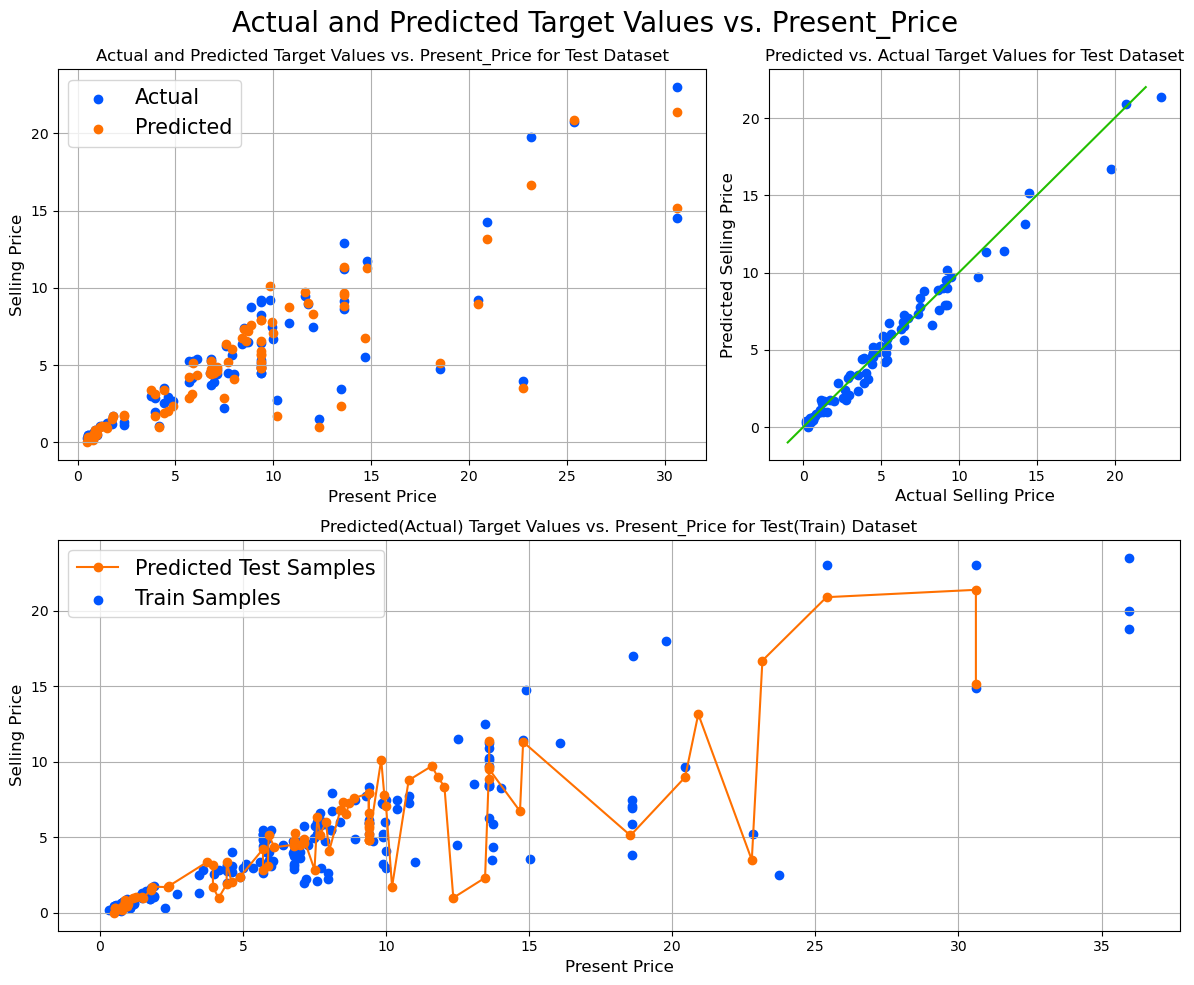

In [74]:
colors = ['#0055ff', '#ff7000', '#23bf00']

fig = plt.figure(figsize=(12,10), dpi=100)
ax1 = plt.subplot2grid((2,5), (0,0), colspan=3)
ax2 = plt.subplot2grid((2,5), (0,3), colspan=2)
ax3 = plt.subplot2grid((2,5), (1,0), colspan=5)

ax1.scatter(df_test['Present_Price'], df_test['y_test'], color=colors[0], label='Actual')
ax1.scatter(df_test['Present_Price'], df_test['y_prediction'], color=colors[1], label='Predicted')
ax1.legend(fontsize=15)
ax1.set_xlabel('Present Price', fontsize=12)
ax1.set_ylabel('Selling Price', fontsize=12)
ax1.set_title('Actual and Predicted Target Values vs. Present_Price for Test Dataset', fontsize=12)
ax1.grid()

ax2.scatter(df_test['y_test'], df_test['y_prediction'], color=colors[0])
ax2.plot([-1,22], [-1,22], color=colors[2])
ax2.set_xlabel('Actual Selling Price', fontsize=12)
ax2.set_ylabel('Predicted Selling Price', fontsize=12)
ax2.set_title('Predicted vs. Actual Target Values for Test Dataset', fontsize=12)
ax2.grid()

df_test.sort_values(by='Present_Price', inplace=True)
df_test.reset_index(drop=True, inplace=True)
ax3.scatter(df_train['Present_Price'], df_train['Selling_Price'], color=colors[0], label='Train Samples')
ax3.plot(df_test['Present_Price'], df_test['y_prediction'], color=colors[1], label='Predicted Test Samples', marker = 'o')
ax3.legend(fontsize=15)
ax3.set_xlabel('Present Price', fontsize=12)
ax3.set_ylabel('Selling Price', fontsize=12)
ax3.set_title('Predicted(Actual) Target Values vs. Present_Price for Test(Train) Dataset', fontsize=12)
ax3.grid()    

plt.suptitle('Actual and Predicted Target Values vs. Present_Price', fontsize=20)
plt.tight_layout()
#plt.savefig("Data Visualization_Present Price.jpg", dpi=200)
plt.show()

## 5.5.6.2. Selling_Price vs. Kms_Driven: 

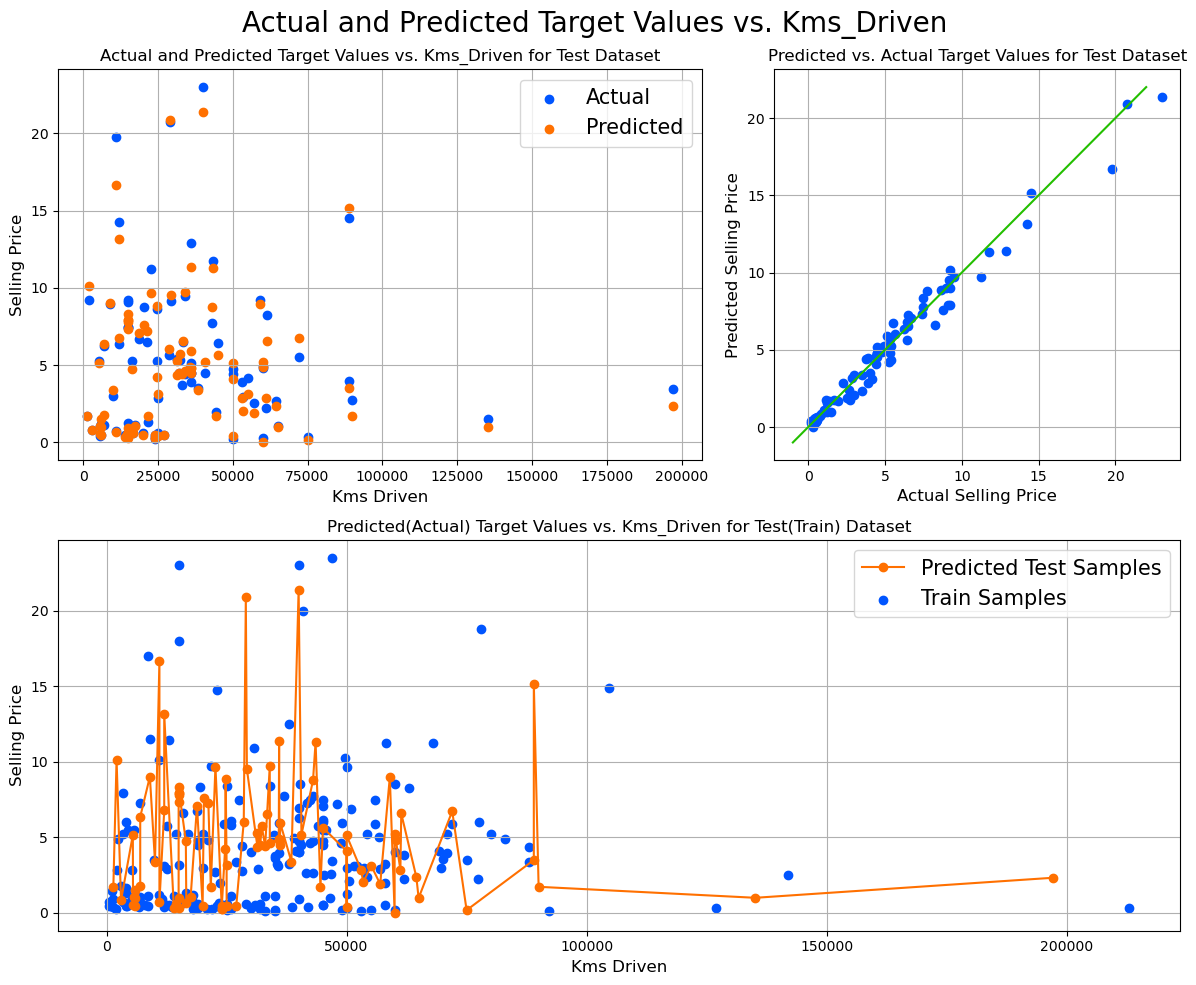

In [75]:
colors = ['#0055ff', '#ff7000', '#23bf00']

fig = plt.figure(figsize=(12,10), dpi=100)
ax1 = plt.subplot2grid((2,5), (0,0), colspan=3)
ax2 = plt.subplot2grid((2,5), (0,3), colspan=2)
ax3 = plt.subplot2grid((2,5), (1,0), colspan=5)

ax1.scatter(df_test['Kms_Driven'], df_test['y_test'], color=colors[0], label='Actual')
ax1.scatter(df_test['Kms_Driven'], df_test['y_prediction'], color=colors[1], label='Predicted')
ax1.legend(fontsize=15)
ax1.set_xlabel('Kms Driven', fontsize=12)
ax1.set_ylabel('Selling Price', fontsize=12)
ax1.set_title('Actual and Predicted Target Values vs. Kms_Driven for Test Dataset', fontsize=12)
ax1.grid()

ax2.scatter(df_test['y_test'], df_test['y_prediction'], color=colors[0])
ax2.plot([-1,22], [-1,22], color=colors[2])
ax2.set_xlabel('Actual Selling Price', fontsize=12)
ax2.set_ylabel('Predicted Selling Price', fontsize=12)
ax2.set_title('Predicted vs. Actual Target Values for Test Dataset', fontsize=12)
ax2.grid()

df_test.sort_values(by='Kms_Driven', inplace=True)
df_test.reset_index(drop=True, inplace=True)
ax3.scatter(df_train['Kms_Driven'], df_train['Selling_Price'], color=colors[0], label='Train Samples')
ax3.plot(df_test['Kms_Driven'], df_test['y_prediction'], color=colors[1], label='Predicted Test Samples', marker = 'o')
ax3.legend(fontsize=15)
ax3.set_xlabel('Kms Driven', fontsize=12)
ax3.set_ylabel('Selling Price', fontsize=12)
ax3.set_title('Predicted(Actual) Target Values vs. Kms_Driven for Test(Train) Dataset', fontsize=12)
ax3.grid()

plt.suptitle('Actual and Predicted Target Values vs. Kms_Driven', fontsize=20)
plt.tight_layout()
#plt.savefig("Data Visualization_Kms_Driven.jpg", dpi=200)
plt.show()

## 5.5.6.3. Selling_Price vs. Age: 

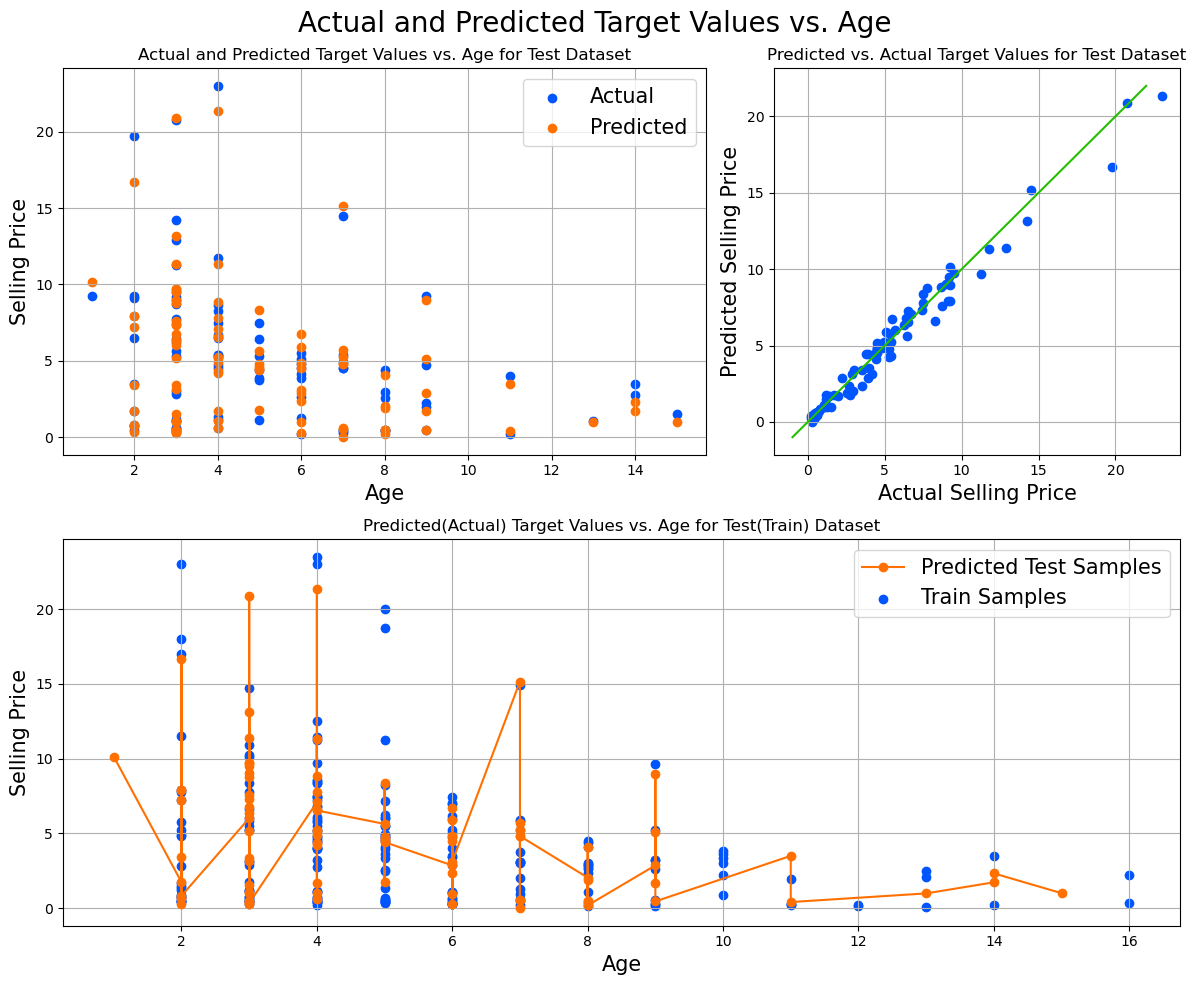

In [76]:
colors = ['#0055ff', '#ff7000', '#23bf00']  

fig = plt.figure(figsize=(12,10), dpi=100)
ax1 = plt.subplot2grid((2,5), (0,0), colspan=3)
ax2 = plt.subplot2grid((2,5), (0,3), colspan=2)
ax3 = plt.subplot2grid((2,5), (1,0), colspan=5)

ax1.scatter(df_test['Age'], df_test['y_test'], color=colors[0], label='Actual')
ax1.scatter(df_test['Age'], df_test['y_prediction'], color=colors[1], label='Predicted')
ax1.legend(fontsize=15)
ax1.set_xlabel('Age', fontsize=15)
ax1.set_ylabel('Selling Price', fontsize=15)
ax1.set_title('Actual and Predicted Target Values vs. Age for Test Dataset', fontsize=12)
ax1.grid()

ax2.scatter(df_test['y_test'], df_test['y_prediction'], color=colors[0])
ax2.plot([-1,22], [-1,22], color=colors[2])
ax2.set_xlabel('Actual Selling Price', fontsize=15)
ax2.set_ylabel('Predicted Selling Price', fontsize=15)
ax2.set_title('Predicted vs. Actual Target Values for Test Dataset', fontsize=12)
ax2.grid()

df_test.sort_values(by='Age', inplace=True)
df_test.reset_index(drop=True, inplace=True)
ax3.scatter(df_train['Age'], df_train['Selling_Price'], color=colors[0], label='Train Samples')
ax3.plot(df_test['Age'], df_test['y_prediction'], color=colors[1], label='Predicted Test Samples', marker = 'o')
ax3.legend(fontsize=15)
ax3.set_xlabel('Age', fontsize=15)
ax3.set_ylabel('Selling Price', fontsize=15)
ax3.set_title('Predicted(Actual) Target Values vs. Age for Test(Train) Dataset', fontsize=12)
ax3.grid()

plt.suptitle('Actual and Predicted Target Values vs. Age', fontsize=20)
plt.tight_layout()
#plt.savefig("Data Visualization_Age.jpg", dpi=200)
plt.show()

## 5.5.7. Prediction of the Given Data by Model

In [77]:
X_sample = df5.drop('Selling_Price', axis=1).tail(1)
X_sample_scaled = ScalerX_final.transform(X_sample) 

y_sample_scaled = Model_Final.predict(X_sample_scaled)

y_sample_pred = ScalerY_final.inverse_transform(y_sample_scaled)

y_sample_pred  

array([[3.39992979]])

__The estimated value for the Selling_Price of the given data by the final model is equal to 3.4__

## Selling Price (given data) = 3.4

In [78]:
df1[(df1['Fuel_Type']=='Petrol') & (df1['Seller_Type']=='Dealer') & (df1['Transmission']=='Manual') & (df1['Owner']==1)]

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
56,5,4.10,6.80,39485,Petrol,Dealer,Manual,1
200,3,5.25,5.70,3493,Petrol,Dealer,Manual,1
236,4,4.75,7.13,35866,Petrol,Dealer,Manual,1
296,10,0.00,11.23,42000,Petrol,Dealer,Manual,1


__Above we see samples of dataset whose categorical features have values equal to the  given sample for estimation. By comparing the values, we find out that the estimated value for the given data is a valid value with respect to the values of numerical features.__

____
### Let's conclude about the performance of the final model:


## MAE = 0.50
## MSE = 0.51
## RMSE = 0.71
## R2 Score = 0.98

### Throughout the process of obtaining the final model, the test dataset have been fully unseen by the model. Therefore, the performance obtained is a good estimate of the model performance in real world.
____